### Кластеризация

#### Датасет ирисов

#### Задача:
Возьмите датасет с цветками iris (из библиотеки sklearn). Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

Загружаем данные:

In [2]:
iris = load_iris()

In [3]:
df_x = pd.DataFrame(iris.data, columns = iris.feature_names)
df_y = iris.target

In [4]:
df_x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
df_x_sample = df_x.loc[:,['sepal length (cm)','sepal width (cm)']]
df_x_sample.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


#### Кластеризация

Посмотрим на взаимосвязь наших факторов.

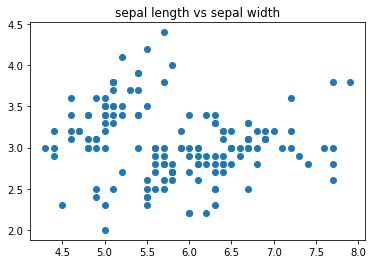

In [7]:
plt.scatter(df_x_sample['sepal length (cm)'], df_x_sample['sepal width (cm)']);
plt.title('sepal length vs sepal width');

В данном случае у нас есть "правильные ответы" по кластерам, поэтому разделим выборку на трейн/тест, чтобы посмотреть, как кластеризация сработает на "новых" данных.

In [8]:
X = df_x_sample
y = df_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                        random_state = 42, stratify =  y, shuffle = True)  

Оба признака в см и примерно значения одного порядка, но для алгоритма, опирающегося на расчет расстояний лучше стандартизировать данные.

In [9]:
sc = StandardScaler()
sc.fit(X_train)

X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

Выберем оптимальное кол-во кластеров для алгоритма с помощью метода локтя. Переход между тремя-четырьмя и четырьмя-пятью кластерами имеет одинаковый наклон. Скорее всего 3 кластера это оптимальное значение.

In [10]:
k_inertia = []
ks = range(1, 20)
for k in ks:
    clf_kmeans = KMeans(n_clusters = k)
    clusters_kmeans = clf_kmeans.fit_predict(X_train_sc)
    k_inertia.append(clf_kmeans.inertia_)

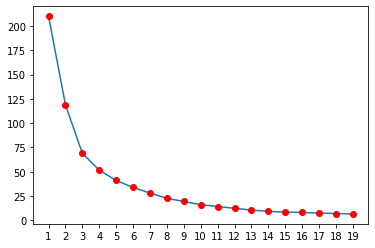

In [11]:
plt.plot(ks, k_inertia);
plt.plot(ks, k_inertia ,'ro');
plt.xticks(range(1, 20, 1));

Попробуем кластеризацию на 3 и на 4 кластера:

In [12]:
kmeans_3 = KMeans(n_clusters = 3)
kmeans_3.fit(X_train_sc)
clusters_3_train = kmeans_3.predict(X_train_sc)


kmeans_4 = KMeans(n_clusters = 4)
kmeans_4.fit(X_train_sc)
clusters_4_train = kmeans_4.predict(X_train_sc)

Фактически деление происходит на три класса. На графике с фактическим делением видно, что два кластера, голубой и желтый, достаточно сильно перемешаны, а алгоритм предполагает выпуклость и однородность кластеров. Поэтому алгоритму такое "уловить" сложно, он их делит так, будто они не пересекаются. Зато фиолетовый кластер алгоритмом определяется почти точно (ошибка в одной точке).

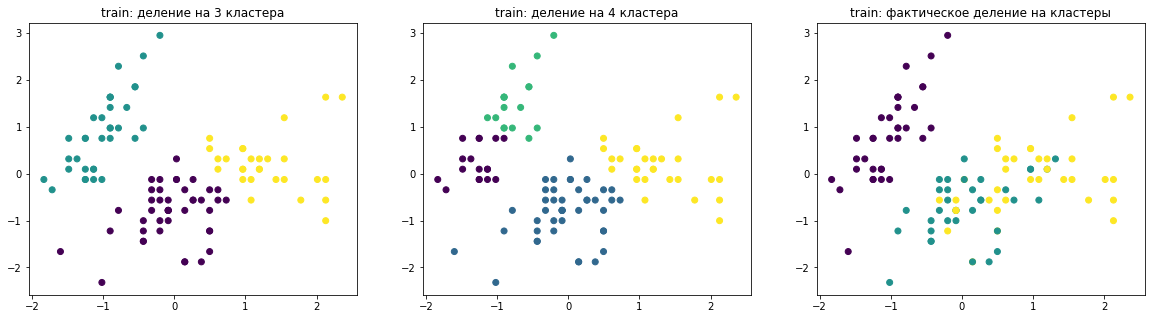

In [13]:
plt.figure(figsize = (20, 5)) 
plt.subplot(1, 3, 1);
plt.scatter(X_train_sc[:,0], X_train_sc[:,1], c = clusters_3_train);
plt.title('train: деление на 3 кластера');
plt.subplot(1, 3, 2);
plt.scatter(X_train_sc[:,0], X_train_sc[:,1], c = clusters_4_train);
plt.title('train: деление на 4 кластера');
plt.subplot(1, 3, 3);
plt.scatter(X_train_sc[:,0], X_train_sc[:,1], c = y_train);
plt.title('train: фактическое деление на кластеры');

Применим алгоритм, обучившийся на трейне к тестовой выборке.

In [14]:
clusters_3_test = kmeans_3.predict(X_test_sc)

clusters_4_test = kmeans_4.predict(X_test_sc)

 Картина примерно такая же, алгоритм почти точно определил кластер в левом верхнем углу. И не смог идентифицировать перемешанность двух других кластеров, разделил их с "ровной границей".

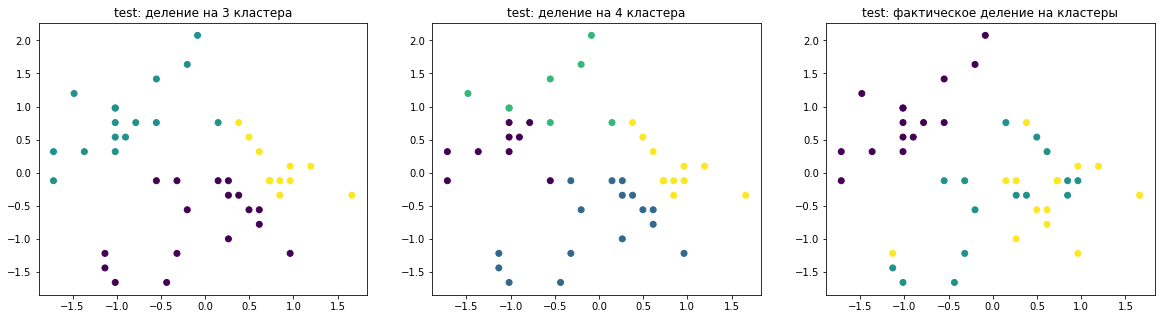

In [15]:
plt.figure(figsize = (20, 5)) 
plt.subplot(1, 3, 1);
plt.scatter(X_test_sc[:,0], X_test_sc[:,1], c = clusters_3_test);
plt.title('test: деление на 3 кластера');
plt.subplot(1, 3, 2);
plt.scatter(X_test_sc[:,0], X_test_sc[:,1], c = clusters_4_test);
plt.title('test: деление на 4 кластера');
plt.subplot(1, 3, 3);
plt.scatter(X_test_sc[:,0], X_test_sc[:,1], c = y_test);
plt.title('test: фактическое деление на кластеры');